In [653]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

class Adaboost:
    
    # Adaboost Class Constructor 
    def __init__(self,Train_X,Train_Y,Test_X,Test_Y,Num_Of_Classifier):
        self.Train_X = Train_X
        self.Train_Y = Train_Y
        self.Test_X = Test_X
        self.Test_Y = Test_Y
        self.Num_Of_Classifier = Num_Of_Classifier # The Number base estimator (Decision Stump)
        self.alpha = None # Stores the alpha value for each Decision Stump in each interation (Example: i=10, store alpha for decision stump number 10)
        self.Weak_Classifier = None # Stores the number of base estimator (Decision Stump)
        self.accuracy = [] # Stores the accuracy for each Decision Stump 
        self.training_error = [] # Stores the traning data predictions 
        self.testing_error = [] # Stores the testing data predictions 
    
    
    # Fitting the Decision Stump based on the Training Dataset Given
    def Build_Model(self):
        #Temp_Arr = self.Train_X.copy()
        #Temp_Arr["Weights"] = 1/len(self.Train_X)
        
        # Extract The Dimension of Train_X data
        num_X, num_Y = np.shape(self.Train_X)
        
        # Set the initial Weight for each of the Train_X data
        weight = np.full(num_X, (1 / num_X))
    
        #Transpose_Train_Y = self.Train_Y.T
        
        train_pred = np.zeros(len(self.Train_X))
        test_pred = np.zeros(len(self.Train_Y))
        
        # Temporary Arrays to store the corresponding alpha and based estimator of each Decision Stump
        alphas = []
        models = []
        pred = []
        pred_2 = []
        Temp = []
        Temp2 = []
        Temp_Test = []
        Temp2_Test = []
        
        
        # This is where we construct/train the Decision Stump Model
        for index in range(self.Num_Of_Classifier):
            
            # Build the Generic Decision Stump
            # Entropy is used here to select the best performing Decision tree in each iteration based on how good a feature can split the Train_X data into 
            clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
            
            # Fit the Decision Stump with the corresponding Train_X data and Train_Y label and the data weights 
            Model = clf.fit(np.float32(self.Train_X),np.float32(self.Train_Y), sample_weight=np.array(weight))
            
            # Store the Fitted Decision Stump intp the models array
            models.append(Model)
            
            # Produce the predicted labels[1,-1] based on the Train_X data using the current ith Decision Stump
            predictions = clf.predict(np.float32(self.Train_X))
            predictions_2 = clf.predict(np.float32(self.Test_X))
            pred.append(predictions)
            pred_2.append(predictions_2)
            score = Model.score(np.float32(self.Train_X),np.float32(self.Train_Y), sample_weight=np.array(weight))
            #error = 1 - score;
            #Temp_Arr["predictions"] = predictions
            
            
#           # Calculate the prediction and misclassification
#             Temp_Arr['correctly_classified'] = np.where(Temp_Arr['predictions'] == self.Train_Y['M'],1,0)
            Temp_Misclassified = np.where(predictions != self.Train_Y['M'],1,0)
               
            
# #             print(Temp_Arr['correctly_classified'])
# #             print(Temp_Arr['misclassified'])
            
#             # Calculate the misclassification and accuracy
#             accuracy = sum(Temp_Arr['correctly_classified'])/len(Temp_Arr['correctly_classified'])
#             misclassification = sum(Temp_Arr['misclassified'])/len(Temp_Arr['misclassified'])
            
#             print(accuracy)
#             print(misclassification)
            
            # Caclulate the error
            #error = np.sum(Temp_Arr['Weights']*Temp_Arr['misclassified']) / sum(Temp_Arr['Weights'])
            
            # Caclulate the error
            error = np.sum(weight[predictions != self.Train_Y['M']])
            
            # Calculate the alpha values
            al = np.log((1-error)/error)
            alphas.append(al)
            
            # Calculate the new weight for each of the data in Train_X
            T = np.sign(self.Train_Y['M'] * predictions)
            #print(T)
            #weight = np.multiply(weight, np.exp([float(x) * -al for x in T]))
            weight *= np.exp(al*Temp_Misclassified)
            weight /= np.sum(weight) # Normalise the weight of each data 
            #print(np.sum(weight))
            #Temp_Arr['Weights'] *= np.exp(-al)
#             Temp_Arr['Weights'] *= np.exp(al*Temp_Arr['misclassified'])
#             Temp_Arr['Weights'] *= np.exp(-al*Temp_Arr['correctly_classified'])
#             Temp_Arr['Weights'] = Temp_Arr['Weights']/np.sum(Temp_Arr['Weights'])

            #Temp_Arr['Weights'] = np.multiply(Temp_Arr['Weights'], np.exp([float(x) * al for x in Temp_Arr['correctly_classified']]))
            #Temp_Arr['Weights'] = np.multiply(Temp_Arr['Weights'], np.exp([float(x) * -al for x in Temp_Arr['misclassified']]))
            
            #Temp_Arr['Weights'] = Temp_Arr['Weights']/np.sum(Temp_Arr['Weights'])
            
            # Calculate the training_error 
            Temp = np.sign(np.sum(np.array(pred),axis=0))
            Temp2 = np.where(Temp == self.Train_Y['M'],1,0)
            
            self.training_error.append(1-(np.sum(Temp2)/len(pred[0])))
            
            Temp_Test = np.sign(np.sum(np.array(pred_2),axis=0))
            Temp2_Test = np.where(Temp_Test == self.Test_Y['M'],1,0)
            
            self.testing_error.append(1-(np.sum(Temp2_Test)/len(pred_2[0])))
                                                                           
# #             print(Temp_Arr["Weights"])
#             print(np.sum(Temp_Arr["Weights"]))
            
#             print(alphas)
        
        # Stores the corresponding alphas and models array into the Adaboost Constructor 
        self.alpha = alphas
        self.Weak_Classifier = models
        #self.training_error = np.sign(np.sum(np.array(pred), axis=0))
    
    def predict(self):
        accuracy = []
        predictions = []
        
        Temp = []
        Temp2 = []
        
        # Calculate the accuracy of each Decision Stump on the Testing dataset 
        for al,clf in zip(self.alpha,self.Weak_Classifier):
            prediction = al*clf.predict(np.float32(self.Test_X))
            predictions.append(prediction)
            
            Temp = np.sign(np.sum(np.array(predictions),axis=0))
            Temp2 = np.where(Temp == self.Test_Y['M'],1,0)
            
            self.accuracy.append(np.sum(Temp2)/len(predictions[0]))
            
            # Calculate the testing error
            #self.testing_error.append(1-(np.sum(Temp2)/len(predictions[0])))
            
            #self.testing_predictions = np.sign(np.sum(np.array(predictions),axis=0))
        
       
        
            
# #             print(np.sum(Temp_Arr['Weights']))
            
            
# #         self.alpha = alphas
# #         self.Weak_Classifier = mode

In [654]:
""" 
Import The Dataset 
"""

#Import the Dataset
dataset = pd.read_csv("wdbc_data.csv")

training_Y = dataset.iloc[0:300,[1]]
training_X = dataset.iloc[0:300,2:]

testing_Y = dataset.iloc[300:,[1]]
testing_X = dataset.iloc[300:,2:]

training_Y[training_Y=='M']=1
training_Y[training_Y=='B']=-1

testing_Y[testing_Y=='M']=1
testing_Y[testing_Y=='B']=-1


# Model = Adaboost(training_X, training_Y, testing_X, testing_Y, 1)
# Model.Build_Model()
# Model.predict()

# len(Model.accuracy)

(268,)
(268,)
(268,)
(268,)
(268,)
(268,)
(268,)
(268,)
(268,)
(268,)
With a number of  10 base models we receive an accuracy of  93.28358208955224 %


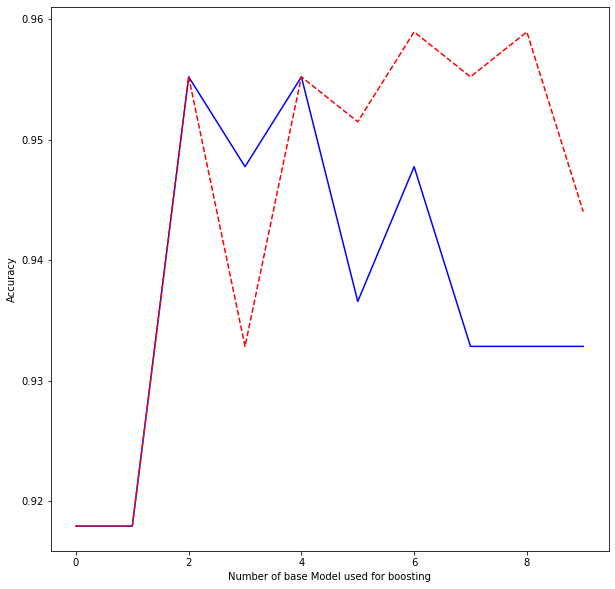

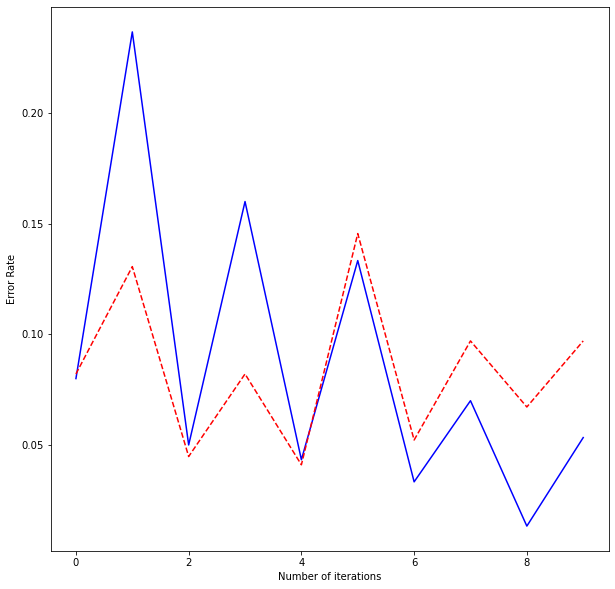

In [655]:
number_of_base_learners = 10

Temp_accuracy = []

fig = plt.figure(figsize=(10,10))
fig2 = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
err0 = fig2.add_subplot(111)


for i in range(1, number_of_base_learners+1):
    model = Adaboost(training_X, training_Y, testing_X, testing_Y, i)
    model.Build_Model()
    model.predict()

train_Y = np.squeeze(np.asarray(training_Y))
test_Y = np.squeeze(np.asarray(testing_Y))

# Sklearn AdaboostClassifier Implementation 
for i in range(1, number_of_base_learners+1):
    AdaBoost = AdaBoostClassifier(n_estimators=i,learning_rate=1,algorithm='SAMME')
    AdaBoost.fit(np.float32(training_X), np.float32(train_Y)) 
    pred = AdaBoost.predict(testing_X)
#     s = 0
#     for k in range(len(pred)):
#         if pred[k] == test_Y[k]:
#             s = s + 1
            
#     acc = s/len(pred)
    #oo = np.where(pred == test_Y['M'], 1, 0)
    print(pred.shape)
    prediction = AdaBoost.score(np.float32(testing_X), np.float32(test_Y))
#     Temp_accuracy.append(acc)
    Temp_accuracy.append(prediction)
    
# print(model.training_error)
# print(model.testing_error)
    
ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.plot(range(len(Temp_accuracy)), Temp_accuracy, 'r--')
ax0.set_xlabel('Number of base Model used for boosting')
ax0.set_ylabel('Accuracy')

err0.plot(range(len(model.training_error)),model.training_error,'-b', range(len(model.testing_error)), model.testing_error, 'r--')
err0.set_xlabel('Number of iterations')
err0.set_ylabel('Error Rate')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()        
